In [20]:
from matplotlib.pylab import*
import numpy as np
import scipy.integrate
from scipy.optimize import minimize
from ipywidgets import IntProgress
from IPython.display import display,clear_output

def integral(i):
    integral,err = scipy.integrate.quad(f,0,np.inf,args=(i))
    return integral,err

class matrix:
    def A(n):
        f = IntProgress(min=0, max=n)
        display(f,'calculate A')
        A=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                if i==j:
                    A[i][j]=-(i**3+3)
                if i+1==j:
                    A[i][j]=(i**2+1)
                if i==j+1:
                    A[i][j]=1
            f.value+=1
        A[0][0]=1
        A[-1][-1]=1
        A[0][1]=-0.5
        A[-1][-2]=0
        clear_output()
        return A
    
    def b(n):   
        b=np.zeros((n,1))
        err=np.zeros((n,1))
        f= IntProgress(min=0,max=n)
        b=np.array(b,dtype='float64')
        display(f,'calculate b')
        for i in range(1,n-1):
            b[i],err[i]=(integral(i))
            f.value+=1
        b[-1]=4
        return b,err
    
    def G(n,err):
        alpha=err
        G=alpha*np.identity(n)
        return G
        
       

In [24]:
n=100
f= lambda x,i: np.cos(2*x)*np.exp(-i**2*x**2-x**2)
A=matrix.A(n)
b,err=matrix.b(n)
G=matrix.G(n,err)

def z0(alpha):
#     x=np.linalg.inv(A.T@A+G.T@G)@A.T@b
    x=np.linalg.inv(A.T@A+alpha*np.identity(n))@A.T@b
    return x

def r(alpha):
    r=np.linalg.norm(A@z0(alpha)-b)
    return r

a=minimize(r,0.5,method='Nelder-Mead').x
print(a)
x=z0(a)

IntProgress(value=0)

'calculate b'

[-4.4408921e-16]


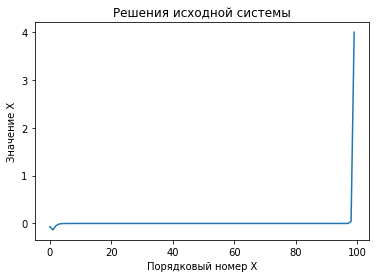

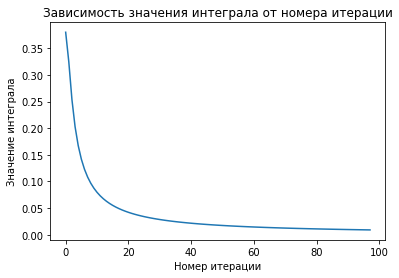

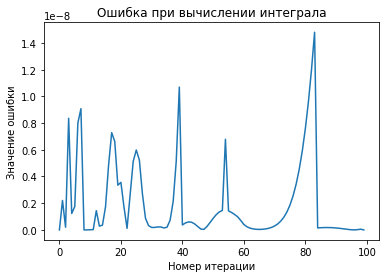

In [25]:
plot(x)
title('Решения исходной системы')
ylabel('Значение X')
xlabel('Порядковый номер X')
show()
int=[]
for i in range(1,n-1):
    int.append(integral(i)[0])
    
title('Зависимость значения интеграла от номера итерации')
xlabel('Номер итерации')
ylabel('Значение интеграла')
plot(int)
show()

title('Ошибка при вычислении интеграла')
ylabel('Значение ошибки')
xlabel('Номер итерации')
plot(err)
show()

In [23]:
a=minimize(r,0.5,method='Nelder-Mead')
print(a)

 final_simplex: (array([[-4.44089210e-16],
       [ 2.44140625e-05]]), array([1.02287852e-13, 9.92948767e-05]))
           fun: 1.0228785218569292e-13
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([-4.4408921e-16])
